# SETUP

In [ ]:
%pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from ipywidgets import interact

## Custom settings

## Custom functions

## Load dataset

In [ ]:
DATA_URL = 'https://raw.githubusercontent.com/cmcouto-silva/datasets/main/datasets/ds_salaries.csv'

In [ ]:
df = pd.read_csv(DATA_URL, index_col=0)
print(df.shape)
df.head()

(607, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# EDA

## Verificando tipos de variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [ ]:
memory_usage1 = df.memory_usage().sum()

In [ ]:
categorical_columns = df.columns[df.dtypes==object].tolist() + ['work_year','remote_ratio']
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   salary_currency     607 non-null    category
 6   salary_in_usd       607 non-null    int64   
 7   employee_residence  607 non-null    category
 8   remote_ratio        607 non-null    category
 9   company_location    607 non-null    category
 10  company_size        607 non-null    category
dtypes: category(9), int64(2)
memory usage: 28.4 KB


In [ ]:
memory_usage2 = df.memory_usage().sum()
memory_reduction = 1 - memory_usage2 / memory_usage1
f'{memory_reduction:.2%}'

'50.07%'

## Validando nulos e duplicados

In [ ]:
df.isna().sum().any()

False

In [ ]:
df.duplicated().sum()

42

In [ ]:
df[df.duplicated(keep=False)].sort_values(df.columns.tolist())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
119,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
181,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
217,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
367,2022,MI,FT,Data Analyst,58000,USD,58000,US,0,US,S
...,...,...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
372,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
439,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M
371,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M


In [ ]:
df.drop_duplicates(inplace=True)

# Análise univariada

Análise univariada com variáveis numéricas e categóricas, separadamente.

In [ ]:
df.select_dtypes('number').describe()

,salary,salary_in_usd
count,5.650000e+02,565.000000
mean,3.381160e+05,110610.343363
std,1.599879e+06,72280.702792
min,4.000000e+03,2859.000000
25%,6.700000e+04,60757.000000
50%,1.109250e+05,100000.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


In [ ]:
df.select_dtypes('category').describe()

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,565,565,565,565,565,565,565,565,565
unique,3,4,4,50,17,57,3,50,3
top,2022,SE,FT,Data Scientist,USD,US,100,US,M
freq,278,243,546,130,359,295,346,318,290


In [ ]:
df.experience_level.value_counts()

SE    243
MI    208
EN     88
EX     26
Name: experience_level, dtype: int64

In [ ]:
df.stb.freq(['experience_level'])

,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000


In [ ]:
for categorical_column in categorical_columns:
  print(f'### -- {categorical_column} -- ###')
  display(df.stb.freq([categorical_column]))
  print()

### -- experience_level -- ###


,experience_level,count,percent,cumulative_count,cumulative_percent
0,SE,243,43.008850,243,43.008850
1,MI,208,36.814159,451,79.823009
2,EN,88,15.575221,539,95.398230
3,EX,26,4.601770,565,100.000000



### -- employment_type -- ###


,employment_type,count,percent,cumulative_count,cumulative_percent
0,FT,546,96.637168,546,96.637168
1,PT,10,1.769912,556,98.407080
2,CT,5,0.884956,561,99.292035
3,FL,4,0.707965,565,100.000000



### -- job_title -- ###


,job_title,count,percent,cumulative_count,cumulative_percent
0,Data Scientist,130,23.008850,130,23.008850
1,Data Engineer,121,21.415929,251,44.424779
2,Data Analyst,82,14.513274,333,58.938053
3,Machine Learning Engineer,39,6.902655,372,65.840708
4,Research Scientist,16,2.831858,388,68.672566
5,Data Science Manager,12,2.123894,400,70.796460
6,Data Architect,11,1.946903,411,72.743363
7,Machine Learning Scientist,8,1.415929,419,74.159292
8,Big Data Engineer,8,1.415929,427,75.575221
9,Principal Data Scientist,7,1.238938,434,76.814159



### -- salary_currency -- ###


,salary_currency,count,percent,cumulative_count,cumulative_percent
0,USD,359,63.539823,359,63.539823
1,EUR,93,16.460177,452,80.000000
2,GBP,43,7.610619,495,87.610619
3,INR,27,4.778761,522,92.389381
4,CAD,18,3.185841,540,95.575221
5,TRY,3,0.530973,543,96.106195
6,PLN,3,0.530973,546,96.637168
7,JPY,3,0.530973,549,97.168142
8,SGD,2,0.353982,551,97.522124
9,MXN,2,0.353982,553,97.876106



### -- employee_residence -- ###


,employee_residence,count,percent,cumulative_count,cumulative_percent
0,US,295,52.212389,295,52.212389
1,GB,43,7.610619,338,59.823009
2,IN,30,5.309735,368,65.132743
3,CA,27,4.778761,395,69.911504
4,DE,24,4.247788,419,74.159292
5,FR,18,3.185841,437,77.345133
6,ES,15,2.654867,452,80.000000
7,GR,12,2.123894,464,82.123894
8,JP,7,1.238938,471,83.362832
9,PT,6,1.061947,477,84.424779



### -- company_location -- ###


,company_location,count,percent,cumulative_count,cumulative_percent
0,US,318,56.283186,318,56.283186
1,GB,46,8.141593,364,64.424779
2,CA,28,4.955752,392,69.380531
3,DE,27,4.778761,419,74.159292
4,IN,24,4.247788,443,78.407080
5,FR,15,2.654867,458,81.061947
6,ES,14,2.477876,472,83.539823
7,GR,10,1.769912,482,85.309735
8,JP,6,1.061947,488,86.371681
9,PT,4,0.707965,492,87.079646



### -- company_size -- ###


,company_size,count,percent,cumulative_count,cumulative_percent
0,M,290,51.327434,290,51.327434
1,L,193,34.159292,483,85.486726
2,S,82,14.513274,565,100.000000



### -- work_year -- ###


,work_year,count,percent,cumulative_count,cumulative_percent
0,2022,278,49.203540,278,49.203540
1,2021,215,38.053097,493,87.256637
2,2020,72,12.743363,565,100.000000



### -- remote_ratio -- ###


,remote_ratio,count,percent,cumulative_count,cumulative_percent
0,100,346,61.238938,346,61.238938
1,0,121,21.415929,467,82.654867
2,50,98,17.345133,565,100.000000


## Gráficos

### Variáveis categóricas

In [ ]:
df_plot = df.groupby('experience_level', as_index=False).size()
df_plot

,experience_level,size
0,EN,88
1,EX,26
2,MI,208
3,SE,243


In [ ]:
fig = px.pie(df_plot, names='experience_level', values='size')
fig.update_layout(title=dict(text='<b>Experience level</b>', x=.5))

In [ ]:
@interact(target_column=['experience_level', 'employment_type', 'remote_ratio', 'company_size'])
def pie_plot(target_column):
  df_plot = df.groupby(target_column, as_index=False).size()
  fig = px.pie(df_plot, names=target_column, values='size')
  fig.update_layout(title=dict(text=f'<b>{target_column}</b>', x=.5))
  fig.show()

interactive(children=(Dropdown(description='target_column', options=('experience_level', 'employment_type', 'r…

In [ ]:
px.bar(df_plot, x='experience_level', y='size', title='experience_level')

In [ ]:
@interact(categorical_column=categorical_columns)
def bar_plot(categorical_column):
  df_counts = df.stb.freq([categorical_column])
  fig = px.bar(df_counts, x=categorical_column, y='count', title=categorical_column)
  fig.update_layout(width=1200)
  fig.show()

interactive(children=(Dropdown(description='categorical_column', options=('experience_level', 'employment_type…

### Variáveis numéricas

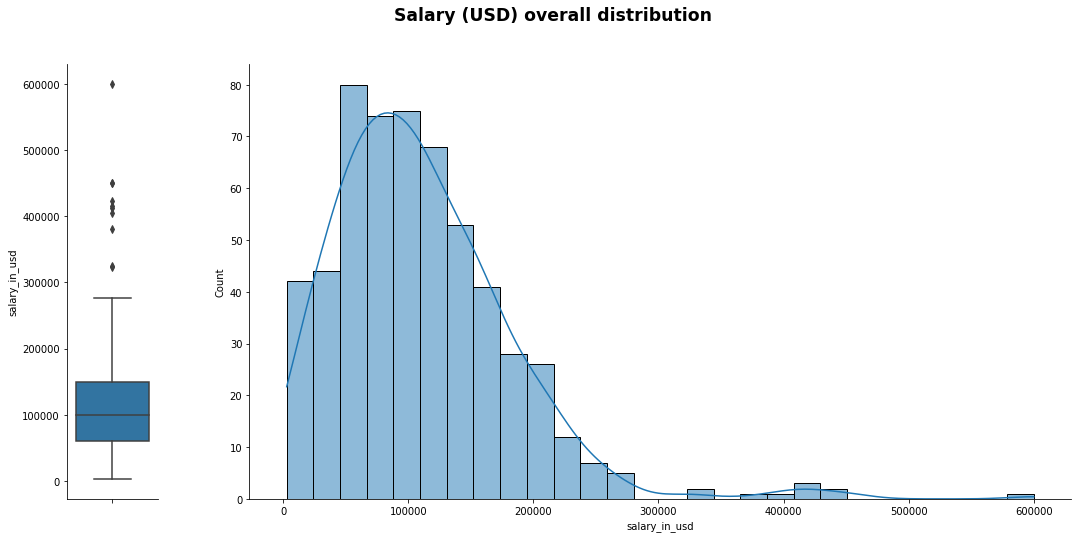

In [ ]:
fig,axes = plt.subplots(ncols=2, figsize=(18,8), gridspec_kw={'width_ratios': [.1,.9]})

sns.histplot(x=df.salary_in_usd, kde=True, ax=axes[1])
sns.boxplot(y=df.salary_in_usd, ax=axes[0])
plt.suptitle('Salary (USD) overall distribution', weight='bold', size='xx-large')
sns.despine()
plt.show()

In [ ]:
px.histogram(df, x='salary_in_usd', opacity=.5, marginal='box').update_layout(width=1200)

# Análise Multivariada

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Tem associaçao entre o nível de experiência e o tamanho da companhia?  
E entre o nível de experiência com o trabalho remoto?